# Sheet 02, Exercise 4
Anne, Asli, Fabian

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,12)
%matplotlib inline

## a)

The equation to describe a unit sphere is $x^1+y^2+z^2=1$

So for $x$ the possible values $x \in [0,1]$

For $y$ th epossible values are $y \in [0,\sqrt{1-x^2}]$

and for $z$ the possible values are $z \in [0,\sqrt{1-x^2-y^2}]$

The upper limits are therefore
\begin{align}
y_1(x) &= \sqrt{1-x^2} \\
z_1(x,y) &= \sqrt{1-x^2-y^2}
\end{align}

## b)

In [4]:
def trapezoid(f, a, b, N):  # same as in A3
    x = np.linspace(a, b, N + 1)  # We want N intervals, so N+1 points
    h = (b - a) / N
    result = h / 2 * (f(a) + f(b))
    result += h * np.sum(f(x[1:-1]))  # exclude first and last value
    return result

In [5]:
from functools import partial


def z1(x, y):
    return np.sqrt(
        np.clip(1 - x**2 - y**2, 0, None)
    )  # clip to avoid sqrt of negative values


def G(x, N):
    y1 = np.sqrt(1 - x**2)
    F = partial(z1, x)
    value = trapezoid(F, 0, y1, N)
    return value

## c)

In [6]:
N = 100
G_N = partial(G, N=N)
V_num = 8 * trapezoid(G_N, 0, 1, N)
print(f"numerical Volume: {V_num}")
V_true = 4 / 3 * np.pi
print(f"true Volume: {V_true}")
print(f"relative error: {abs(V_num - V_true) / V_true}")

numerical Volume: 379.8517238000136
true Volume: 4.1887902047863905
relative error: 89.68291922712426


## d)

In [10]:
import timeit

Ns = np.logspace(1, 4, 10, dtype=int)
print(Ns)
t = np.zeros(len(Ns))
for i, N in enumerate(Ns):
    G_N = partial(G, N=N)
    t[i] = timeit.timeit(lambda: 8 * trapezoid(G_N, 0, 1, N), number=10)
    print(f"done for N={N}, time: {t[i]/10}")

[   10    21    46   100   215   464  1000  2154  4641 10000]
done for N=10, time: 0.00021453499998642657
done for N=21, time: 0.00021023389999754726
done for N=46, time: 0.00032638659999975064
done for N=100, time: 0.0001701968999896053
done for N=215, time: 0.00030759789999592615
done for N=464, time: 0.0008085088000143514
done for N=1000, time: 0.006731900600016161
done for N=2154, time: 0.04277567869999075
done for N=4641, time: 0.16929970760002105
done for N=10000, time: 0.6940283669000109


Text(0.5, 1.0, 'Time to compute the volume with differnt $N$')

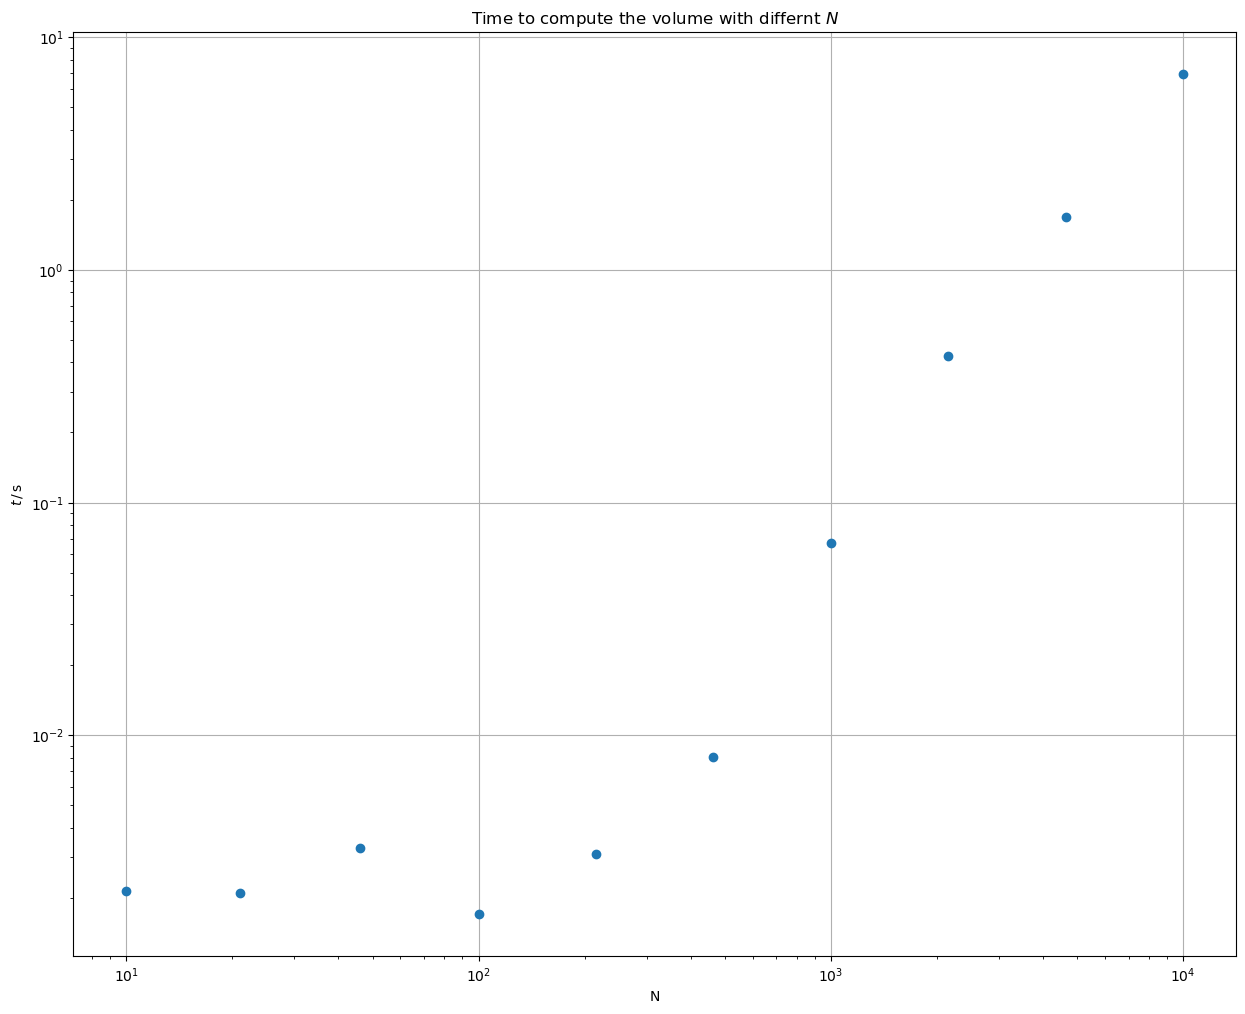

In [19]:
plt.plot(Ns, t, "o")
plt.xlabel("N")
plt.ylabel(r"$t\,/\,\mathrm{s}$")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.title("Time to compute the volume with differnt $N$")

You can see, that the executions time for high dimensional integrals scales badly with $N$ as every dimension needs to make $N$ function calls. Because each function itself makes $N$ calls again, the time scales with $N^{d-1}$